<a href="https://colab.research.google.com/github/avanegasp/talleres-DS-Uc/blob/main/Copia_de_Caso_de_uso_Churn_Exploracion_v3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastcore -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Contexto de negocio**

Una entidad bancaria está preocupada por la tasa de abandono de sus clientes. La tasa de abandono, también conocida como **churn**, se refiere a la proporción de clientes que dejan de hacer negocios con el banco en un período de tiempo determinado. El abandono de clientes es un problema importante para cualquier institución financiera, ya que puede resultar en una pérdida de ingresos y un debilitamiento de la reputación del banco.

Para abordar este problema, el banco ha recopilado datos de sus clientes, como su edad, género, nivel de ingresos, balance en la cuenta, duración de la relación con el banco, entre otros. El banco quiere utilizar estos datos para construir un modelo de clasificación que pueda predecir la probabilidad de abandono para cada cliente. Con esta información, el banco podrá identificar los clientes que tienen mayor probabilidad de abandonar y tomar medidas para retenerlos, como ofrecerles mejores tasas de interés, promociones y descuentos.

En esta primera fase se hará el proceso de entendimiento y exploración de la data empleando estadística descriptiva y mucha visualización.

Algunas de las preguntas que queremos resolver son:
- ¿Qué caracteriza a un cliente desertor?
- ¿Cuáles son las variables más relacionadas con la cancelación de cuenta de ahorro?

## **0. Importación de librerias**


Iniciamos con la importación de las librerias que vamos a usar durante nuestro caso de estudio.

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive

In [ ]:
# Se añade el drive
drive.mount('/content/drive')

# Se define el directorio padre - modifiquelo según necesidad
# os.chdir(
#     '/content/drive/MyDrive/U CATALUÑA/Big data y data science/Actualización 2023/Casos de uso'
#     )

Mounted at /content/drive


## **1. Carga de Datos**

In [ ]:
# Cargar los datos
data = pd.read_csv(
    'https://raw.githubusercontent.com/Haroldgio28/Probabilidad_de_impago/main/data/case%202/Churn%20Modeling.csv'
    )
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **2. Detección**

In [ ]:
# Ver la forma del DataFrame
data.shape

(10000, 14)

In [ ]:
# Resumen completo de las variables, tipología y valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Se tienen un dataset compuesto por 10000 registros (filas) y 14 variables (columnas). Cada registro representa a un cliente. A continuación se describen las variables presentes en el dataset

| Nombre de la variable | Descripción                                                                                  | Tipología estadística | Representación  |
|-----------------------|----------------------------------------------------------------------------------------------|-----------------------|-----------------|
| RowNumber             | Número de la fila                                                                            | NA                    | Entero          |
| CustomerId            | Identificador numérico de 8 digitos                                                          | NA                    | Entero          |
| Surname               | Apellido                                                                                     | Cualitativo           | String          |
| CreditScore           | Calificación crediticia                                                                      | Cuantitativo          | Entero          |
| Geography             | Ubicación geográfica del cliente, país                                                       | Cualitativo           | String          |
| Gender                | Sexo del cliente                                                                             | Cualitativo           | String          |
| Age                   | Edad del cliente                                                                             | Cuantitativo          | Entero          |
| Tenure                | Tiempo en años siendo cliente del banco                                                      | Cuantitativo          | Entero          |
| Balance               | Saldo en dólares de la cuenta de ahorros                                                     | Cuantitativo          | Decimal         |
| NumOfProducts         | Cantidad de productos activos con el banco                                                   | Cuantitativo          | Entero          |
| HasCrCard             | Tenencia de tarjeta de crédito. 1, tiene tarjeta de crédito. 0, no tiene tarjeta de crédito  | Cualitativa           | Entero          |
| IsActiveMember        | Define si un cliente es activo o no. 1, activo. 0, no activo                                 | Cualitativo           | Entero          |
| EstimatedSalary       | Salario anual estimado en dólares                                                            | Cuantitativo          | Decimal         |
| Exited                | Define si el cliente canceló su cuenta de ahorros. 1, canceló                                | Cualitativo           | Entero          |


## **3. Análisis Exploratorio de Datos (EDA)**

In [ ]:
# Lista de variables numéricas
num_vars = [ 'CreditScore', 'Geography', 'Age',
            'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
# Lista de variables categóricas
cat_vars = ['Surname','Gender','HasCrCard',
            'IsActiveMember','Exited']

# Se convierten las variables categóricas en object
for var in cat_vars:
  data[var] = data[var].astype('object')

Se verifica el tipo de dato almacenado en cada variable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
# Obtener estadísticas descriptivas de las variables numéricas
data[num_vars].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
# Se exporta el resumen para las variables categóricas
data[num_vars].describe().to_excel('descriptivas_num.xlsx')

In [ ]:
# Resumen estadístico para variables categóricas
data.describe(include = 'object')

,Surname,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000
unique,2932,3,2,2,2,2
top,Smith,France,Male,1,1,0
freq,32,5014,5457,7055,5151,7963


In [ ]:
# Se exporta el resumen para las variables categóricas
data.describe(include = 'object').to_excel('descriptivas_cat.xlsx')

In [ ]:
# Validación cantidad de clientes presentes en el dataset
data.CustomerId.nunique()

10000

Se verifica que en la base de datos hay 10000 clientes, y que no hay registros duplicados.

Ahora vamos a validar datos nulos en la base.

In [ ]:
# Verificar valores faltantes
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3.1 Análisis univariado

#### Histogramas
Los **histogramas** son gráficos utilizados para representar la distribución de una **variable numérica**. Estos gráficos dividen el rango de valores de la variable en intervalos (llamados "bins" o "clases") y cuentan la cantidad de observaciones que caen dentro de cada intervalo. La altura de cada barra en el histograma indica la frecuencia o recuento de observaciones en ese intervalo.

Para el puntaje crediticio, se puede observar que la mediana está sobre los 650, y se observa un pico sobre los 850 puntos.

Text(0, 0.5, 'Frecuencia absoluta')

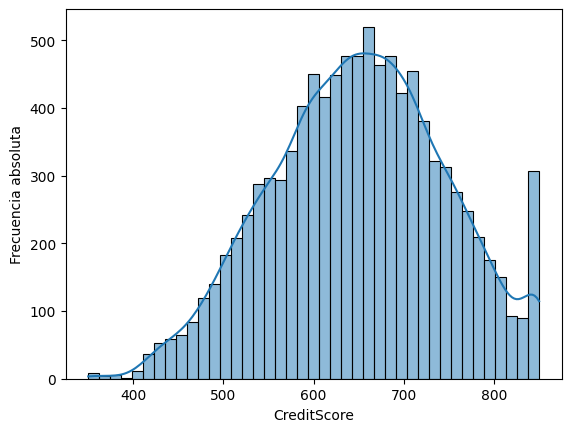

In [ ]:
sns.histplot(
    data = data, # Fuente de datos
    x = 'CreditScore', # Variable
    kde = True # Opcional, estimación de la densidad
    )

plt.ylabel('Frecuencia absoluta') # Añadir

In [ ]:
# Cálculo de mediana para la variable CreditScore

data['CreditScore'].median()

# Intente con otros operadores como:
# mean(), std(), var(), kurt(), skew()

652.0

In [ ]:
# Cáculo de mediana para todas las variables

data.median().astype('int')

<ipython-input-19-9510210abf51>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median().astype('int')


RowNumber              5000
CustomerId         15690738
CreditScore             652
Age                      37
Tenure                    5
Balance               97198
NumOfProducts             1
HasCrCard                 1
IsActiveMember            1
EstimatedSalary      100193
Exited                    0
dtype: int64

#### **Kdeplot**
El kdeplot, abreviatura de Kernel Density Estimation Plot, es un gráfico utilizado para estimar y visualizar la densidad de probabilidad de una variable continua. Este gráfico muestra una representación suave de la distribución de datos en forma de una curva.

Ahora veamos de forma gráfica como se distribuyen las edades de los clientes en nuestro dataset.

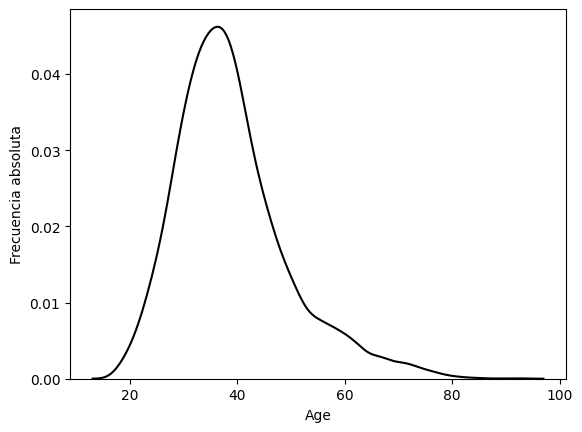

In [ ]:
sns.kdeplot(
    data = data,
    x = 'Age',
    color = 'black'
    )

plt.ylabel('Frecuencia absoluta')
plt.show()

Los colores disponibles para las gráficas los puede encontrar [aquí](https://matplotlib.org/stable/gallery/color/named_colors.html).

Adicionalmente, podemos complementar la gráfica anterior con los percentiles. Primero calculemos los percentiles para la variable Age.

**Nota**: Los cuantiles se expresan de 0 a 1, mientras que los percentiles se expresan de 0 a 100

In [ ]:
# Lista con los percentiles a calcular
percents = [0.05,0.25,0.5,0.75,0.95]

# Calculo de los percentiles para la variable edad
results = data['Age'].quantile(percents)
results

0.05    25.0
0.25    32.0
0.50    37.0
0.75    44.0
0.95    60.0
Name: Age, dtype: float64

Añadamos ahora a la gráfica de densidad los percentiles calculados como barras verticales.

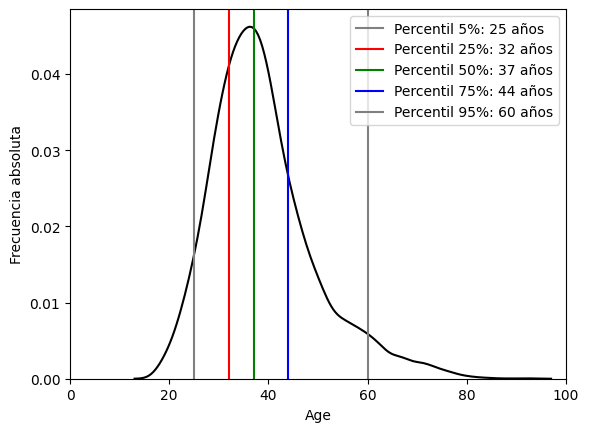

In [ ]:
# Creación de la gráfica
sns.kdeplot(data = data,
             x = 'Age',
            color = 'black'
            )

plt.ylabel('Frecuencia absoluta')

# Diccionario con colores para cada percentil
colors = {
    0.05: 'gray',
    0.25: 'r',
    0.5 :'g',
    0.75: 'b',
    0.95: 'gray'}

for i in percents: # Iteramos sobre la lista de percentiles
  plt.axvline( # Crear lineas verticales, axhline
      x = results[i], # Posición
      color = colors[i], # Color
      label = f'Percentil {int(i*100)}%: {int(results[i])} años' # Etiqueta
      )

# Ubicación de la leyenda
plt.legend(
    loc = 'upper right'
    )

plt.xlim((0,100))
plt.show()

Como se observa en la visualización anterior, tenemos una mediana de edad de 37 años entre los clientes del banco. Además se puede determinar que el 95% de clientes está entre los 18 y los 60 años.



#### Boxplot

Una forma útil de ver la distribución de las variables es mediante un boxplot.

- El rectángulo central en el medio del gráfico se llama "caja" y representa el rango intercuartílico (IQR). La parte inferior de la caja corresponde al percentil 25 (Q1), la línea dentro de la caja representa la mediana (Q2 o percentil 50), y la parte superior de la caja corresponde al percentil 75 (Q3).

- Los "bigotes" se extienden desde la caja y representan la variabilidad de los datos más allá del IQR. Estas líneas pueden tener diferentes longitudes y se suelen calcular utilizando umbrales estadísticos, como 1.5 veces el IQR.
- Los "outliers" son valores atípicos que están más allá de los bigotes. Estos puntos se representan como puntos individuales en el gráfico.


Text(0, 0.5, 'NA')

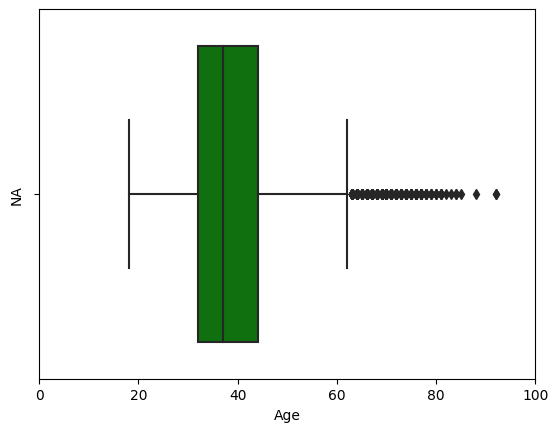

In [ ]:
sns.boxplot(
    data = data,
    x = 'Age',
    color = 'green'
            )

plt.xlim((0,100))
plt.ylabel('NA')

#### Count Plots

Ahora veamos como nos pueden ayudar los **countplots** para entender como se distribuyen nuestras **variables categóricas**.

 Estos gráficos son especialmente útiles para visualizar la distribución de las categorías y comparar la cantidad de ocurrencias entre ellas.

 En problemas de clasificación, los countplots pueden mostrar el desequilibrio de clases al visualizar la cantidad de instancias en cada clase. Esto es particularmente importante cuando se trabaja con conjuntos de datos desbalanceados, donde algunas clases tienen muchas más ocurrencias que otras.

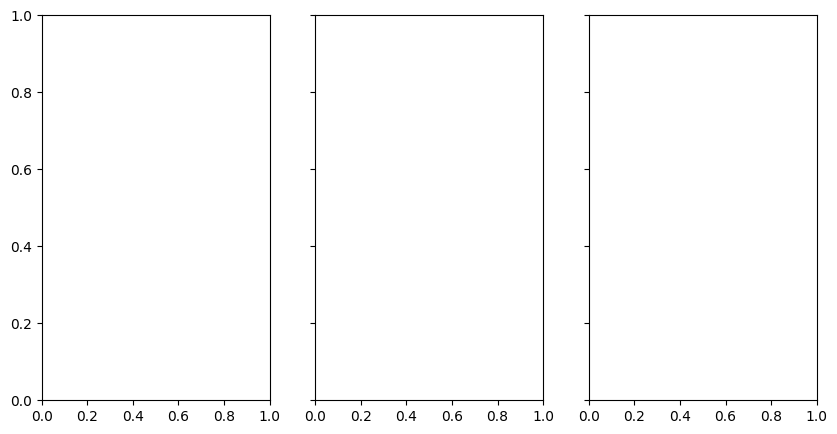

In [ ]:
# Vamos a crear un lienzo para varias gráficas
# fig - representa el lienzo, dimensiones, distribución
# axes - es la parte que contiene la información a grafica
fig, axes = plt.subplots(
    1,3,                # 1 fila, 3 columnas
    figsize = (10,5),   # tamaño
    sharey = True       # eje y compartido
    )

In [ ]:
# El objeto axes es una arreglo de 3 dimensiones
axes

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

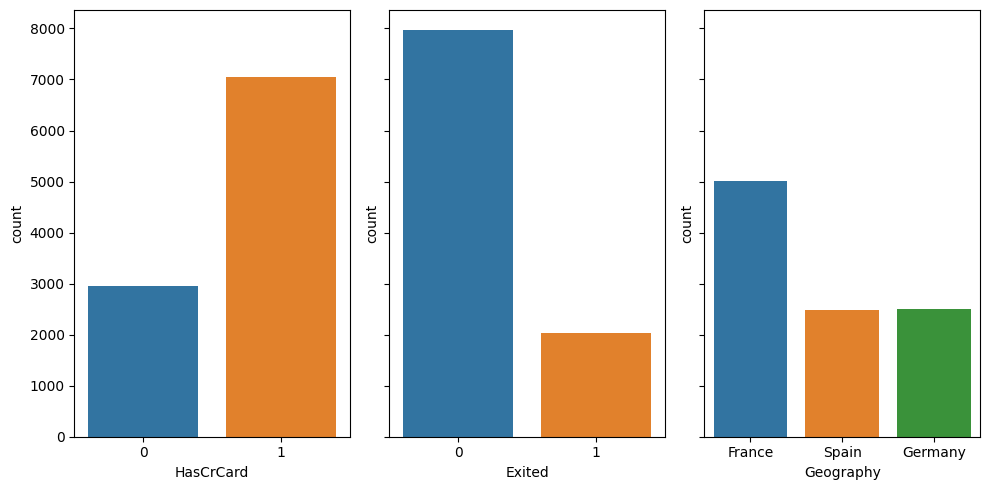

In [ ]:
# Creación del lienzo
fig, axes = plt.subplots(
    1,3,
    figsize = (10,5),
    sharey = True)

# Gráfica 1
sns.countplot(
    data = data,
    x = 'HasCrCard',
    ax = axes[0],     # posición 1 del arreglo
    )

# Gráfica 2
sns.countplot(
    data = data,
    x = 'Exited',
    ax = axes[1],   # posición 2 del arreglo
    )

# Gráfica 3
sns.countplot(
    data = data,
    x = 'Geography',
    ax = axes[2],   # posición 3 del arreglo
)

plt.tight_layout() # evita que los objetos se sobrelapen

### 3.2 Análisis multivariado

#### Diagramas de dispersión

Un **scatterplot**, también conocido como diagrama de dispersión, es un tipo de gráfico que se utiliza para visualizar la relación entre dos variables numéricas. Cada punto en el scatterplot representa una observación y su posición en el gráfico está determinada por los valores de las dos variables en el eje x y el eje y.

A continuación se observa un scatterplot entre las variables de edad y puntaje crediticio. No se observa una relación evidente entre estas dos variables.

<Axes: xlabel='Age', ylabel='CreditScore'>

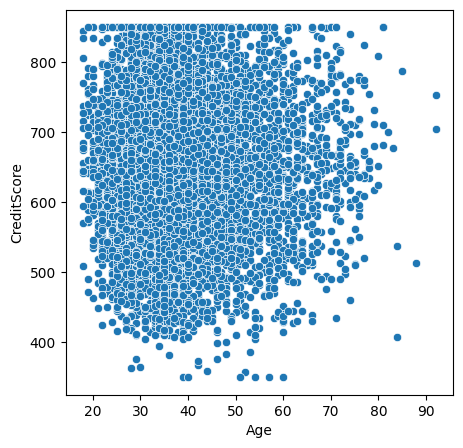

In [ ]:
plt.subplots(figsize = (5,5))

sns.scatterplot(
    data = data,
    x = 'Age',
    y = 'CreditScore' ,
    )

#### Jointplot

Es un tipo de gráfico que combina un scatterplot y un histograma en un solo gráfico. Este gráfico es útil para visualizar la relación entre dos variables y examinar simultáneamente su distribución individual.

Este gráfico es mucho más útil para ver relación entre la edad y el puntaje crediticio. Se puede observar la mayor cantidad de clientes se concentran entre los 30 y 40 años, con puntajes entres 600 y 700 puntos.

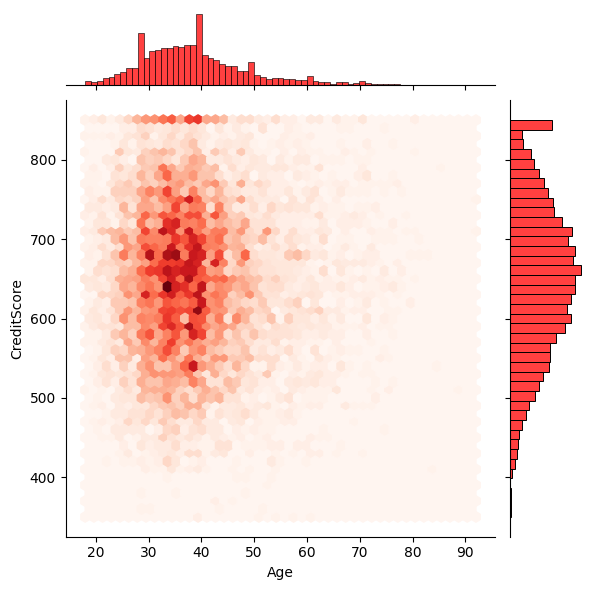

In [ ]:
sns.jointplot(
    data = data,
    x = 'Age',
    y = 'CreditScore',
    color = 'red',
    kind="hex",   # mapa de calor hexagonal
    cmap="Reds",
    )

plt.show()

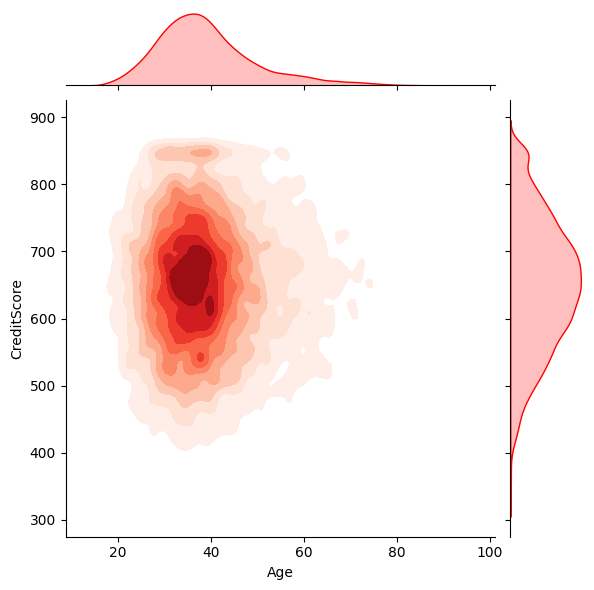

In [ ]:
sns.jointplot(
    data = data,
    x = 'Age',
    y = 'CreditScore',
    color = 'red',
    cmap="Reds",
    kind="kde",  # density kernel estimation
    fill=True,
    bw_adjust=.5,
    )

plt.show()

Se puede hacer un joint plot usando una distribución, pero haciendo la distinción entre clientes que se mantienen y clientes que abandonaron los productos del banco.

En el siguiente gráfico se observa que la mayor cantidad de churn se generó entre usuarios alrededor de los 43 años con puntajes crediticios cercanos a los 650 puntos, como se puede ver en el diagrama de calor que se genera de este jointplot.

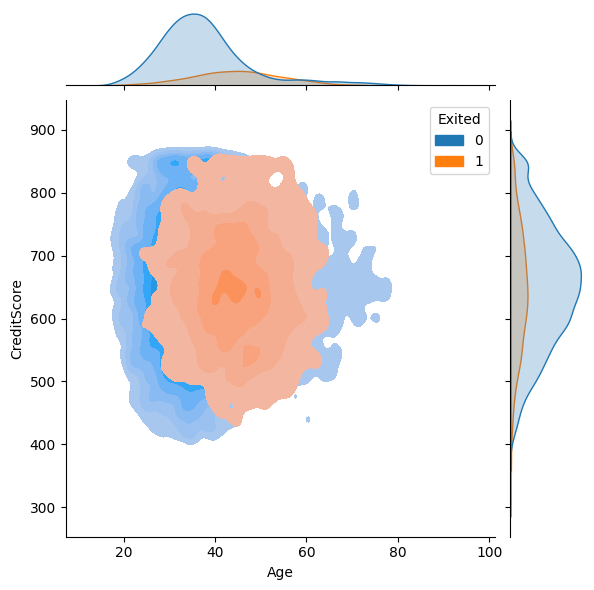

In [ ]:
sns.jointplot(
    data = data,
    x = 'Age',
    y = 'CreditScore',
    color = 'red',
    hue = 'Exited',   # Mapea por color las posibles clases de esta categoría
    fill=True,
    bw_adjust=.5,
    kind="kde"
    )

plt.show()

En la siguiente gráfica intentamos crear una gráfica dependiente de la ubicación del cliente, sin embargo, no es una gráfica que aporte valor.

Nota: Este escenario es muy común, pero es necesario experimentar para escoger las mejores visualizaciones para nuestro caso de uso.

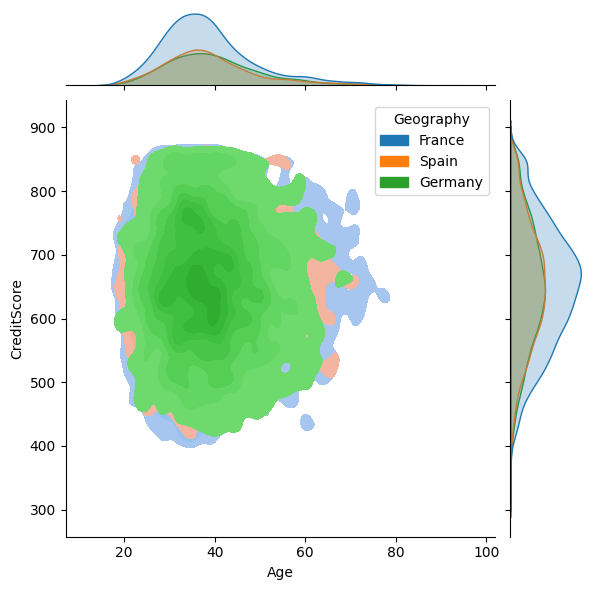

In [ ]:
sns.jointplot(
    data = data,
    x = 'Age',
    y = 'CreditScore',
    color = 'red',
    hue = 'Geography',   # Mapea por color las posibles clases de esta categoría
    fill=True,
    bw_adjust=.5,
    kind="kde"
    )

plt.show()

#### Diagramas de barras

Es un tipo de gráfico que se utiliza para representar datos categóricos mediante barras rectangulares de diferentes alturas. Estas barras representan la frecuencia, recuento o cualquier otra medida asociada a cada categoría.

El diagrama de barras mostrado a continuación confirma la hipótesis planteada anteriormente donde deciamos que los clientes que hicieron churn tienen en promedio 44 años y tienen un puntaje crediticio alrededor de los 650 puntos.

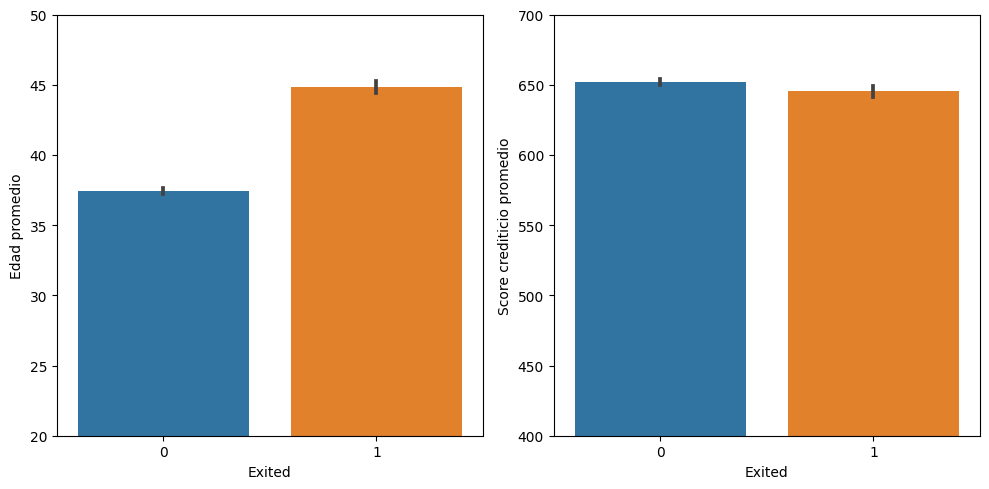

In [ ]:
# Crear lienzo
fig, axes = plt.subplots(
    1,2,
    figsize = (10,5),
    )

# Gráfica 1
sns.barplot(
    data = data,
    y = 'Age',
    x = 'Exited',
    ax = axes[0],
)

axes[0].set_ylim(20,50)
axes[0].set_ylabel('Edad promedio')

# Gráfica 2
sns.barplot(
    data = data,
    y = 'CreditScore',
    x = 'Exited',
    ax = axes[1],
)
axes[1].set_ylim(400,700)
axes[1].set_ylabel('Score crediticio promedio')


plt.tight_layout()

Hay diferentes formas de llegar a esta misma gráfica, abordemos una segunda manera.

In [ ]:
(data.groupby('Exited') # Agrupar por la variable Exited
[['Age','CreditScore']] # Filtrar variables de interés
 .mean())               # Calcular la media

 # Nota: los paréntesis del inicio y fin permiten separar en varias lineas la instrucción

,Age,CreditScore
Exited,,
0,37.408389,651.853196
1,44.837997,645.351497


<Axes: xlabel='Exited'>

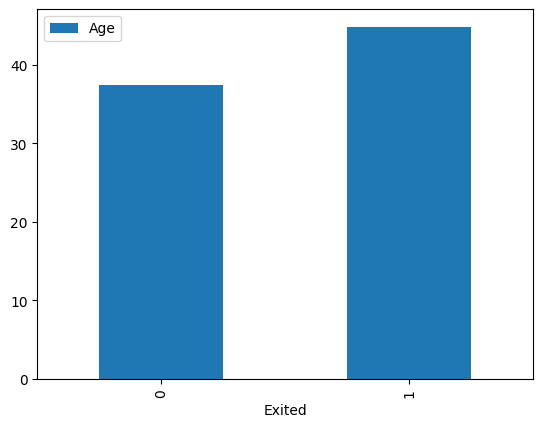

In [ ]:
# Usar método simplificado directamente sobre la serie
data.groupby('Exited')[['Age']].mean().plot(kind = 'bar')

#### Boxplot

La mejor forma de sacarle provecho a los boxplot es comparar las distribuciones de las variables de acuerdo a distintas categorias.

En la siguiente visualización, se puede observar que la edad de las personas que hacen churn suele ser mayor que las personas que se mantienen con el cliente. Mientras que el credit score no parece cambiar entre ambos grupos de clientes.

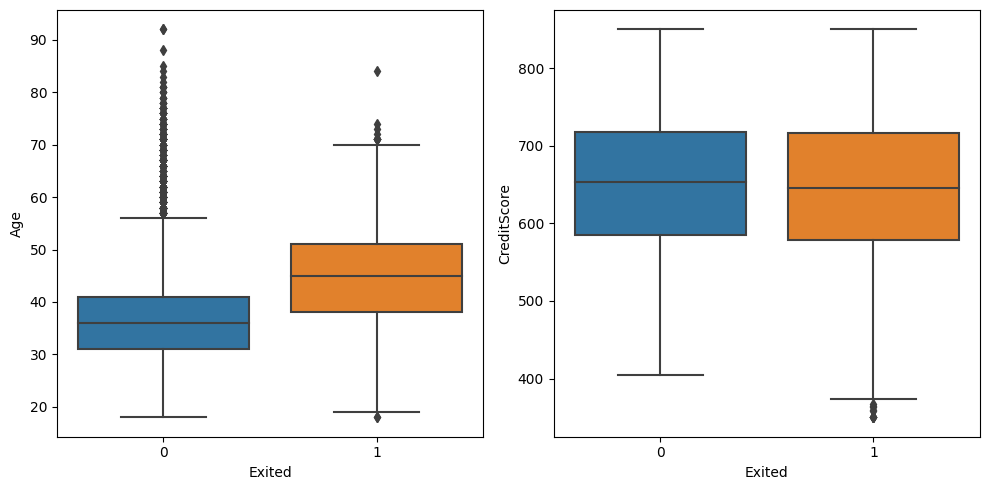

In [ ]:
fig, axes = plt.subplots(
    1,2,
    figsize = (10,5),
    )

sns.boxplot(
    data = data,
    y = 'Age',
    x = 'Exited',
    ax = axes[0],
)

sns.boxplot(
    data = data,
    y = 'CreditScore',
    x = 'Exited',
    ax = axes[1],
)

plt.tight_layout()

De nuevo, estas métricas se pueden calcular empleando manipulación de DataFrames. Veamóslo a continuación.

In [ ]:
(data.groupby('Exited')       # Agrupar por Exited
[['Age','CreditScore']]       # Filtrar variables de interés
 .quantile([0.25,0.5,0.75]))  # Calcular percentiles

Age  CreditScore
Exited                        
0      0.25  31.0        585.0
       0.50  36.0        653.0
       0.75  41.0        718.0
1      0.25  38.0        578.0
       0.50  45.0        646.0
       0.75  51.0        716.0

#### Diagrama de Violín

Es un tipo de gráfico que combina un boxplot con una representación de la densidad de los datos. Este gráfico es útil para visualizar la distribución de una variable numérica o una variable categórica en función de una variable numérica.

Al igual que en un boxplot, el diagrama de violín tiene una "caja" que representa el rango intercuartílico (IQR). La línea dentro de la caja representa la mediana y los bigotes pueden estar presentes para mostrar la dispersión de los datos.

Además,  el diagrama de violín también muestra una representación de la densidad de los datos a través de las curvas en forma de violín a ambos lados del boxplot. Estas curvas indican la frecuencia relativa de los valores en diferentes puntos de la variable.

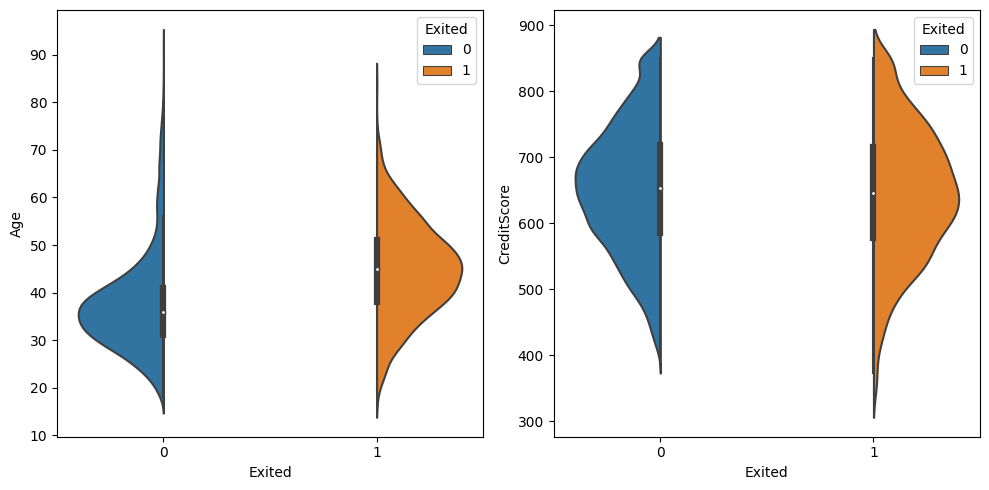

In [ ]:
fig, axes = plt.subplots(1,2,
                         figsize = (10,5),
                        #  sharey = True
                         )

sns.violinplot(
    data = data,
    y = 'Age',
    x = 'Exited',
    ax = axes[0],
    split = True,
    hue = 'Exited'
)

sns.violinplot(
    data = data,
    y = 'CreditScore',
    x = 'Exited',
    ax = axes[1],
    split = True,
    hue = 'Exited'
)

plt.tight_layout()

#### Tabla cruzada y diagramas de calor

También conocida como cross tab, es una forma de resumir y visualizar la relación entre dos variables categóricas. Esta tabla muestra la frecuencia o recuento de observaciones en cada combinación de categorías de las dos variables.

In [ ]:
df_cross = pd.crosstab(
    data['Geography'],
    data['Exited']
    )

# Conteo absoluto
df_cross

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
df_cross = pd.crosstab(
    data['Geography'],
    data['Exited'],
    normalize = 'index'
    )

# Conteo normalizado en las filas, en este caso por país
df_cross

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [ ]:
df_cross = pd.crosstab(
    data['Geography'],
    data['Exited'],
    normalize = 'columns'
    )

# Conteo normalizado en las columnas, en este caso por Categoría de Cancelado
df_cross

Exited,0,1
Geography,,
France,0.527942,0.397644
Germany,0.212859,0.399607
Spain,0.259199,0.202749



En la siguiente gráfica se puede observar la proporción de clientes por país que hicieron churn y/o se mantienen como clientes del banco.

En este caso se asignó el parametro normalize para obtener la proporción de usuarios por país que se clasifican como desertor o cliente.

Además nos apoyamos de un heatmap para tener una visualización que nos permita definir patrones de manera más sencilla.

<Axes: xlabel='Exited', ylabel='Geography'>

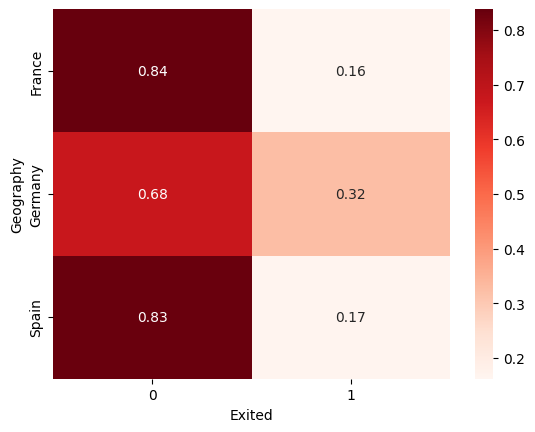

In [ ]:
df_cross = pd.crosstab(
    data['Geography'],
    data['Exited'],
    normalize = 'index'
    )

sns.heatmap(
    df_cross,
    cmap = 'Reds',
    annot= True
    )

In [ ]:
# Se exporta la tabla cruzada

pd.crosstab(
    data['Geography'],
    data['Exited'],
    #  normalize = 'index'
).to_excel('pais_exite.xlsx')

También es posible utilizar la biblioteca Seaborn para crear visualizaciones descriptivas.

## **Otras visualizaciones útiles**



### **Distribución de edades de acuerdo al estado de churn**

<Axes: xlabel='Age', ylabel='Count'>

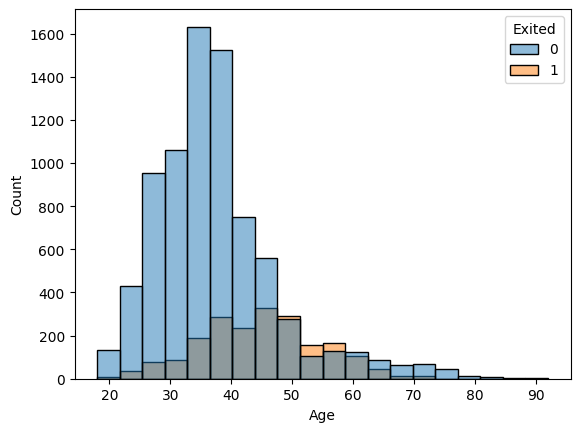

In [ ]:
# Histograma de la edad de los clientes
sns.histplot(data=data,x='Age', bins=20,kde=False,hue="Exited")

Como se puede observar en la gráfica anterior, la mayor cantidad de churners del banco se encuentre entre los 45 y 50 años aproximandamente. Así como la mayor cantidad de clientes del banco están entre los 20 y 40 años.

### **Distribución de edades de acuerdo al sexo**

Ahora es útil revisar la distribución de edades por sexo

<Axes: xlabel='Gender', ylabel='Age'>

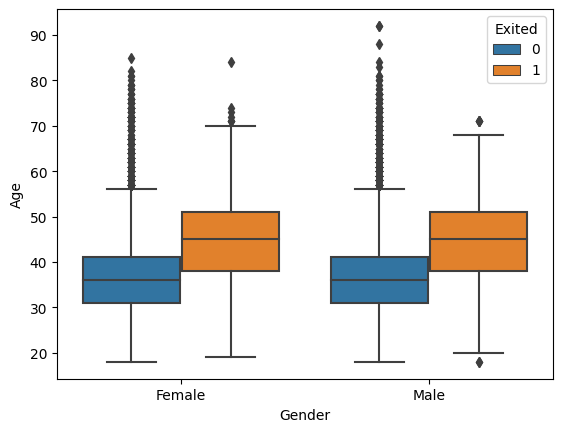

In [ ]:
# Gráfico de barras de la distribución edades por sexo
sns.boxplot(data=data, x="Gender", y="Age",hue="Exited")

Gracias al histograma y el anterior boxplot, se puede confirmar que efectivamente la mediana de churners del banco tienen una edad de 45 años para ambos sexos.

### **Distribución de ingreso por sexo**
Ahora es conveniente analizar la distribución de ingresos por sexo para revisar correlación entre niveles de ingreso por sexo y el churn.

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

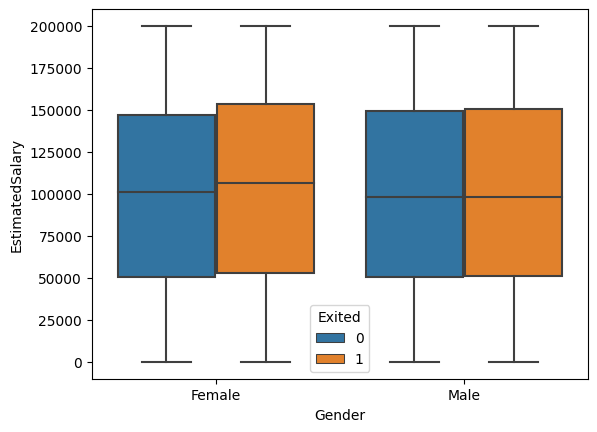

In [ ]:
# Gráfico de barras de la distribución de ingresos por genero
sns.boxplot(data=data, x="Gender", y="EstimatedSalary",hue="Exited")

Como bien se puede observar, en el caso de las mujeres, hay un mayor nivel de ingreso estimado entre aquellas que hacen churn versus las usuarias que se mantienen con productos activos en el banco.

Ahora se podría analizar si la geografía está afectando el nivel de churn.

### **Distribución de ingreso por país**

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

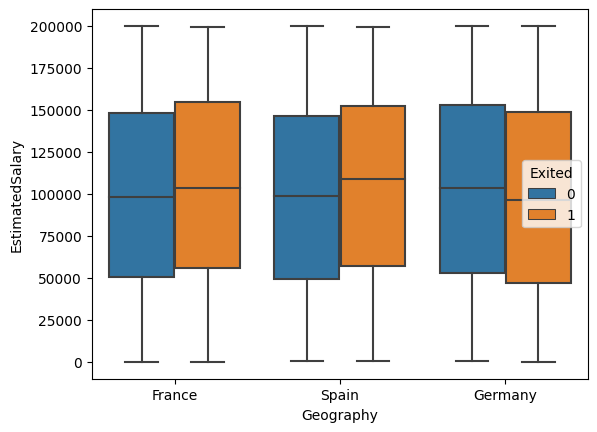

In [ ]:
# Gráfico de barras de la distribución de ingresos por pais
sns.boxplot(data=data, x="Geography", y="EstimatedSalary",hue="Exited")

El boxplot anterior nos indica, que mientras en España y Francia, los churners suelen tener un mayor nivel de ingreso, en Alemania el nivel de ingreso de estos usuarios es más bajo. Sin embargo, estas característica de ubicación geográfica no parece tener un efecto importante sobre el indicador de churn.

## Otros Recursos

Un recurso como primera aproximación de un EDA es hacer un profile mediante la bibiloteca pandas profilling, que nos puede aportar una noción de como están distribuidos nuestros datos para empezar a realizar análisis más profundos, o saber como abordar la limpieza del dataset.

In [ ]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ydata_profiling import ProfileReport

# Se crea el objeto profile
profile = ProfileReport(
    data,
    title="Churn en la banca"
    )

In [ ]:
# Visualizar profile como widget
profile_widget = profile.to_widgets()
profile_widget

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:505: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


In [ ]:
# Exportar el profile como html
profile.to_file("churn_banking.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Créditos**
---

**Profesores:** Harold Uribe Romero - Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*